In [4]:
import sys
import os

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import music21 as m21

import libfmp.c1

In [5]:
fn = "../resources/musicxml/Happy_Birthday_To_You_C_Major.mxl"
s = m21.converter.parse(fn)

In [6]:
s.measures(1, 10).show('text')

{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument 'P1: Piano: Piano'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note D>
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note F>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note E>
        {2.0} <music21.note.Note C>
        {2.5} <music21.note.Note C>
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note D>
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note G>
    {9.0} <music21.stream.Measure 4 offset=9.0>
        {0.0} <music21.note.Note F>
        {2.0} <music21.note.Note C>
        {2.5} <music21.note.Note C>
    {12.0} <music21.stream.Measure 5 offset=12.0>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note A>
        {2.

In [7]:
# import os
# import music21 as m21

# us = m21.environment.UserSettings()
# us_path = us.getSettingsPath()

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file), '/Users/june/workspace/simple-score-following/notebook/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/wf/m9s1kcjn5m3cm0k81x5_k_hc0000gn/T/music21/tmpvg60tlpy.xml>...
JIT is disabled for QML. Property bindings and animations will be very slow. Visit https://wiki.qt.io/V4 to learn about possible solutions for your platform.
	to </var/fo

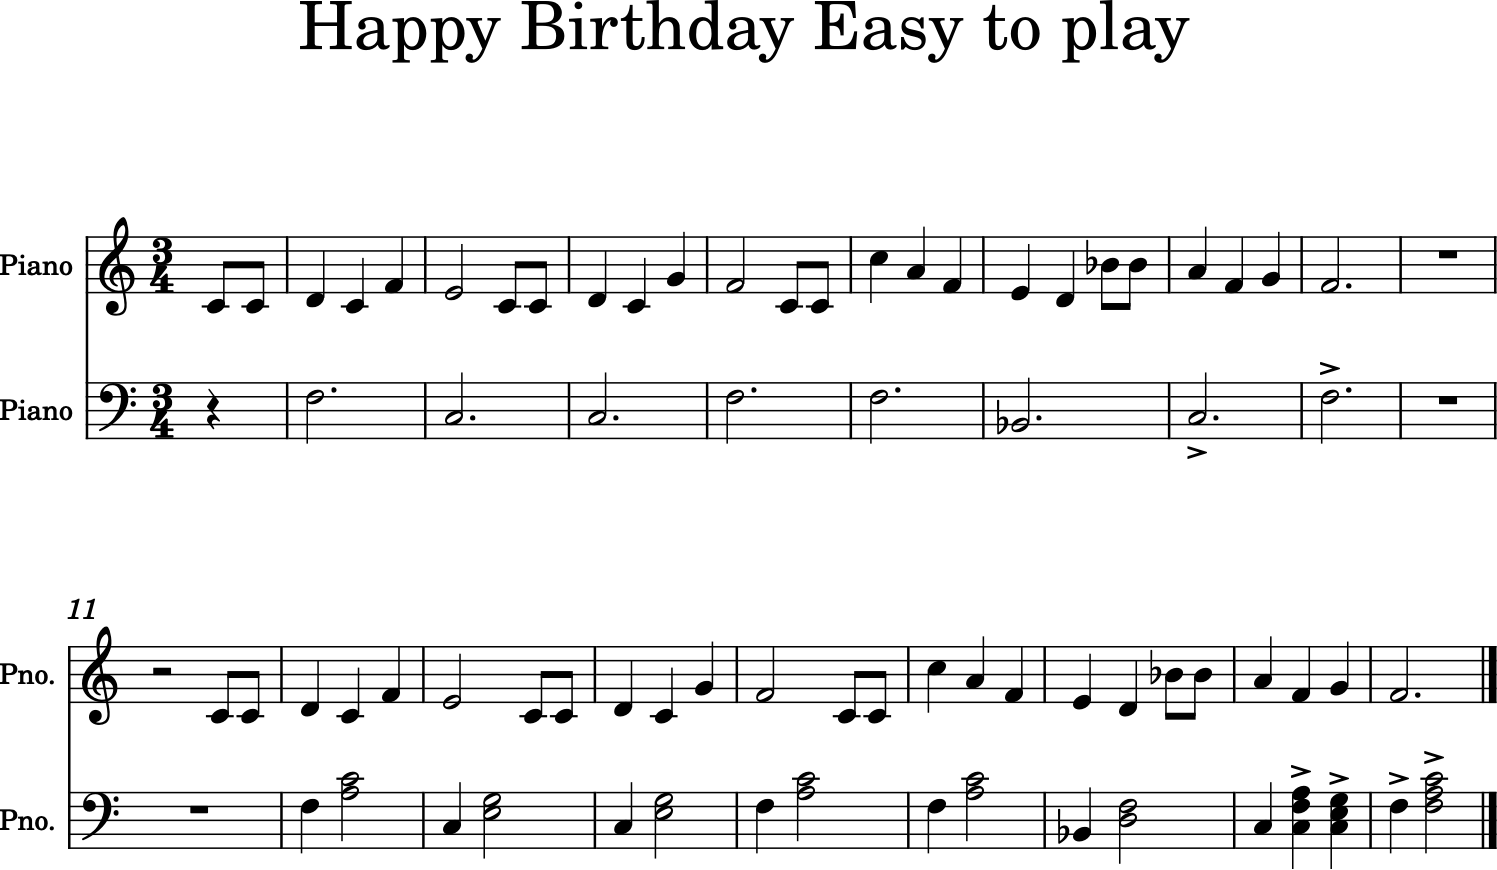

In [8]:
s.show('ipython.musicxml.png')
# s.measures(1, 10).show('musicXML')

In [9]:
s.show('midi')

In [10]:

def xml_to_list(xml):
    """Convert a music xml file to a list of note events

    Notebook: C1/C1S2_MusicXML.ipynb

    Args:
        xml (str or music21.stream.Score): Either a path to a music xml file or a music21.stream.Score

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(xml, str):
        xml_data = m21.converter.parse(xml)
    elif isinstance(xml, m21.stream.Score):
        xml_data = xml
    else:
        raise RuntimeError('midi must be a path to a midi file or music21.stream.Score')

    score = []

    for part in xml_data.parts:
        instrument = part.getInstrument().instrumentName

        for note in part.flat.notes:

            if note.isChord:
                start = note.offset
                duration = note.quarterLength

                for chord_note in note.pitches:
                    pitch = chord_note.ps
                    volume = note.volume.realized
                    score.append([start, duration, pitch, volume, instrument])

            else:
                start = note.offset
                duration = note.quarterLength
                pitch = note.pitch.ps
                volume = note.volume.realized
                score.append([start, duration, pitch, volume, instrument])

    score = sorted(score, key=lambda x: (x[0], x[2]))
    return score

xml_data = m21.converter.parse(fn)
xml_list = xml_to_list(xml_data)

df = pd.DataFrame(xml_list[:9], columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
html = df.to_html(index=False, float_format='%.2f', max_rows=8)
ipd.HTML(html)

Start,End,Pitch,Velocity,Instrument
0.00,0.50,60.00,0.71,Piano
0.50,0.50,60.00,0.71,Piano
1.00,3.00,53.00,0.71,Piano
1.00,1.00,62.00,0.71,Piano
...,...,...,...,...
3.00,1.00,65.00,0.71,Piano
4.00,3.00,48.00,0.71,Piano
4.00,2.00,64.00,0.71,Piano
6.00,0.50,60.00,0.71,Piano


(<Figure size 2160x72 with 1 Axes>,
 <AxesSubplot:xlabel='Time (quarter lengths)', ylabel='Pitch'>)

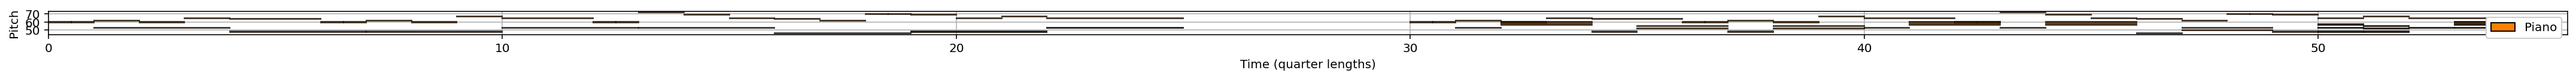

In [11]:
libfmp.c1.visualize_piano_roll(xml_list, figsize=(30, 1), velocity_alpha=True, xlabel='Time (quarter lengths)')

In [12]:
s = s.measures(1, 10)

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file), '/Users/june/workspace/simple-score-following/notebook/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/wf/m9s1kcjn5m3cm0k81x5_k_hc0000gn/T/music21/tmp5f0o50yb.xml>...
JIT is disabled for QML. Property bindings and animations will be very slow. Visit https://wiki.qt.io/V4 to learn about possible solutions for your platform.
	to </var/fo

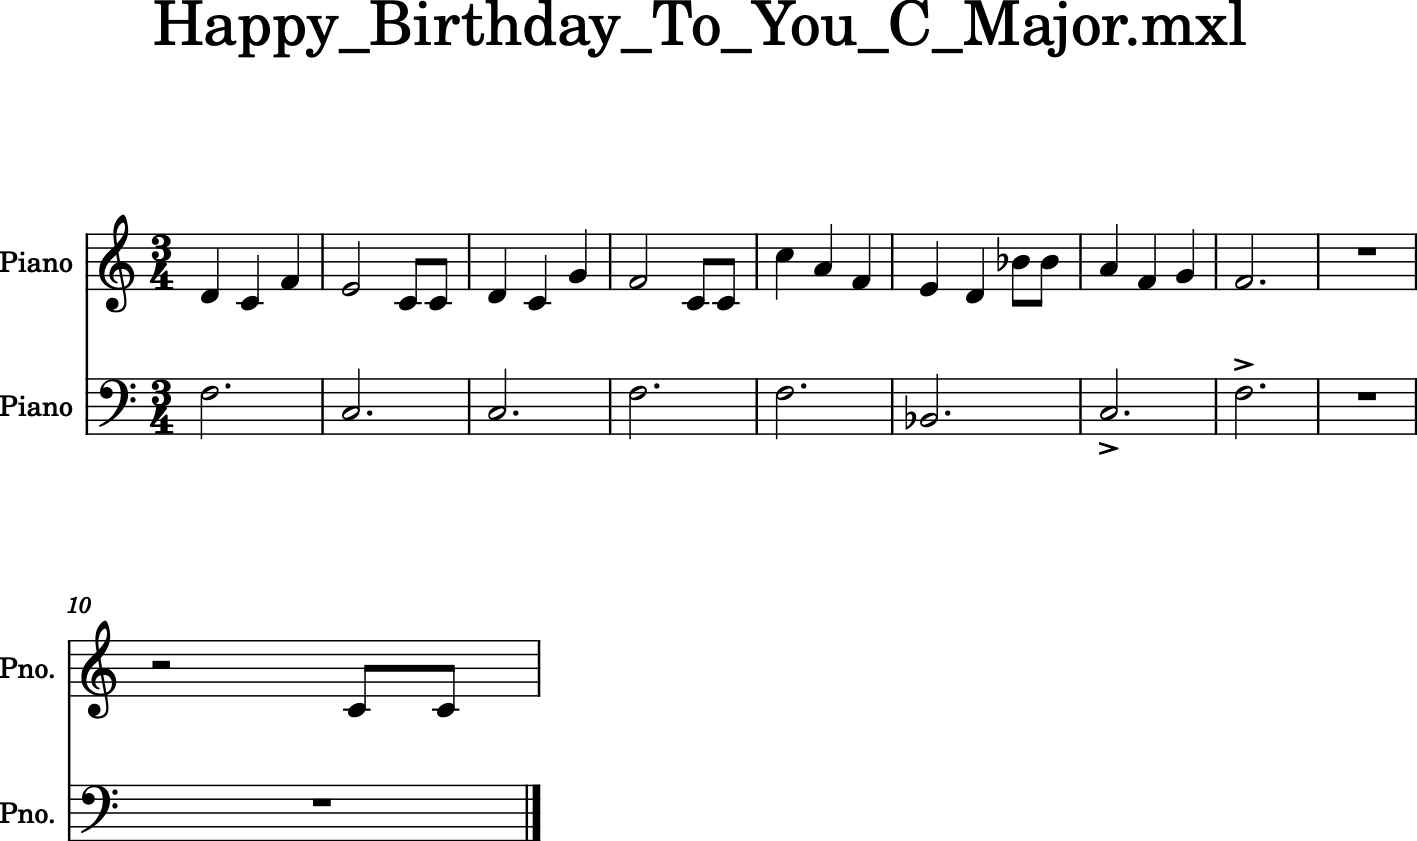

In [13]:
s.show('ipython.musicxml.png')

In [14]:
xml_data = m21.converter.parse(fn)
xml_list = xml_to_list(xml_data[:8])

df = pd.DataFrame(xml_list[:9], columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
html = df.to_html(index=False, float_format='%.2f', max_rows=8)
ipd.HTML(html)

Start,End,Pitch,Velocity,Instrument
0.00,0.50,60.00,0.71,Piano
0.50,0.50,60.00,0.71,Piano
1.00,3.00,53.00,0.71,Piano
1.00,1.00,62.00,0.71,Piano
...,...,...,...,...
3.00,1.00,65.00,0.71,Piano
4.00,3.00,48.00,0.71,Piano
4.00,2.00,64.00,0.71,Piano
6.00,0.50,60.00,0.71,Piano


(<Figure size 720x504 with 1 Axes>,
 <AxesSubplot:xlabel='Time (quarter lengths)', ylabel='Pitch'>)

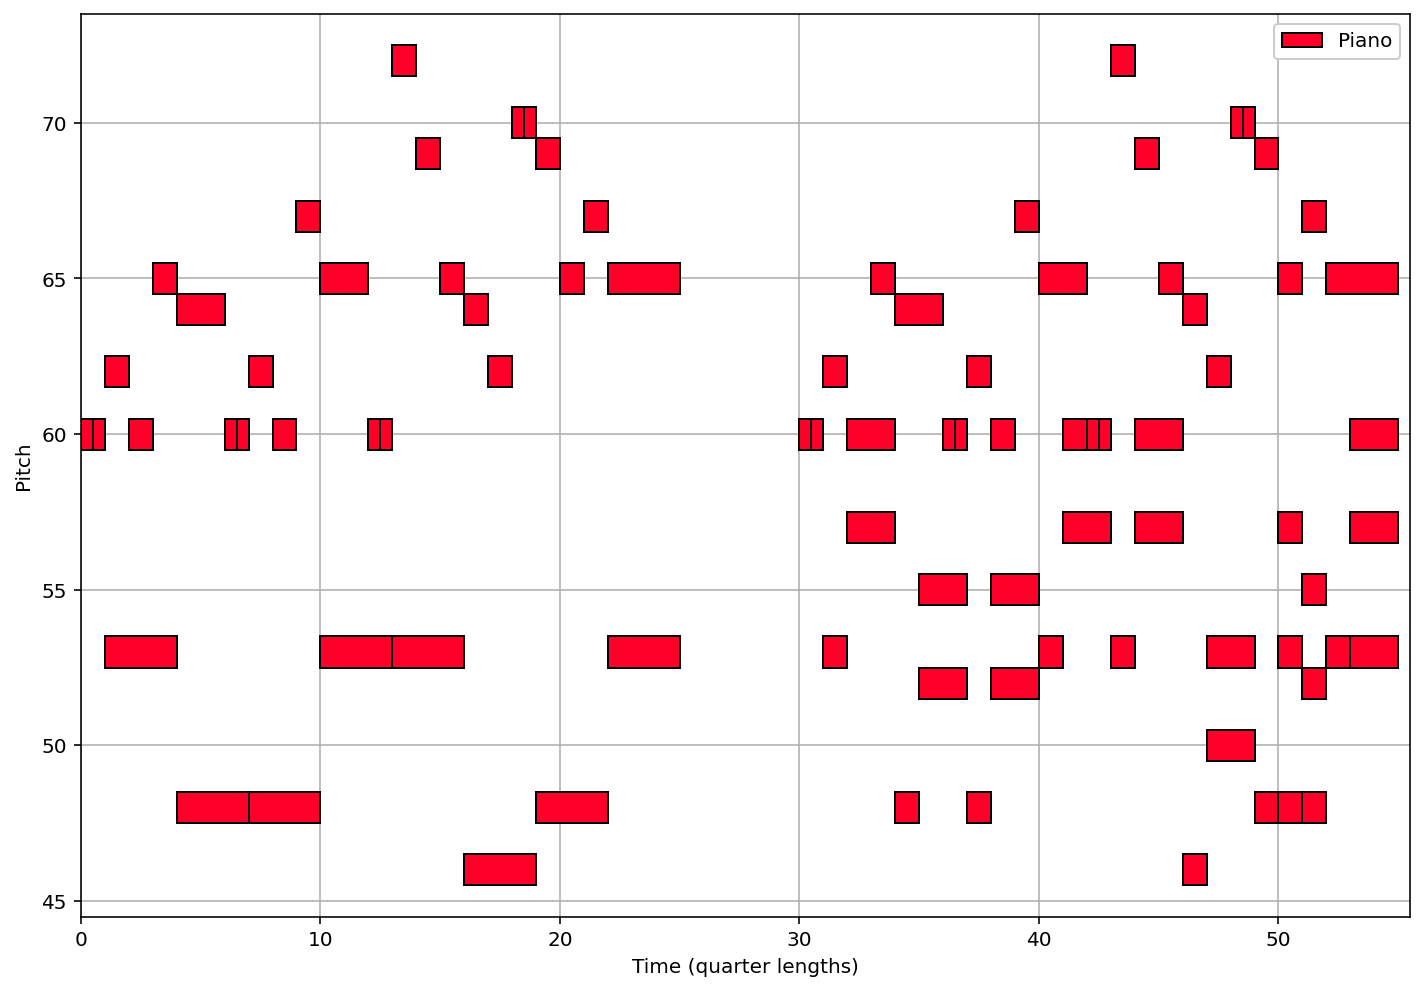

In [15]:
libfmp.c1.visualize_piano_roll(xml_list, figsize=(10, 7), velocity_alpha=False,
                               colors='gist_rainbow', xlabel='Time (quarter lengths)')

In [16]:
s = m21.converter.parse(fn)

In [17]:
s.measures(0, 2).show('text')


{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument 'P1: Piano: Piano'>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.KeySignature of no sharps or flats>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note C>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note D>
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note F>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note E>
        {2.0} <music21.note.Note C>
        {2.5} <music21.note.Note C>
{0.0} <music21.stream.PartStaff P1-Staff2>
    {0.0} <music21.instrument.Instrument 'P1: Piano: Piano'>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance 65, staffNumber 2, sta

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file), '/Users/june/workspace/simple-score-following/notebook/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/wf/m9s1kcjn5m3cm0k81x5_k_hc0000gn/T/music21/tmp9c45b6bp.xml>...
JIT is disabled for QML. Property bindings and animations will be very slow. Visit https://wiki.qt.io/V4 to learn about possible solutions for your platform.
	to </var/fo

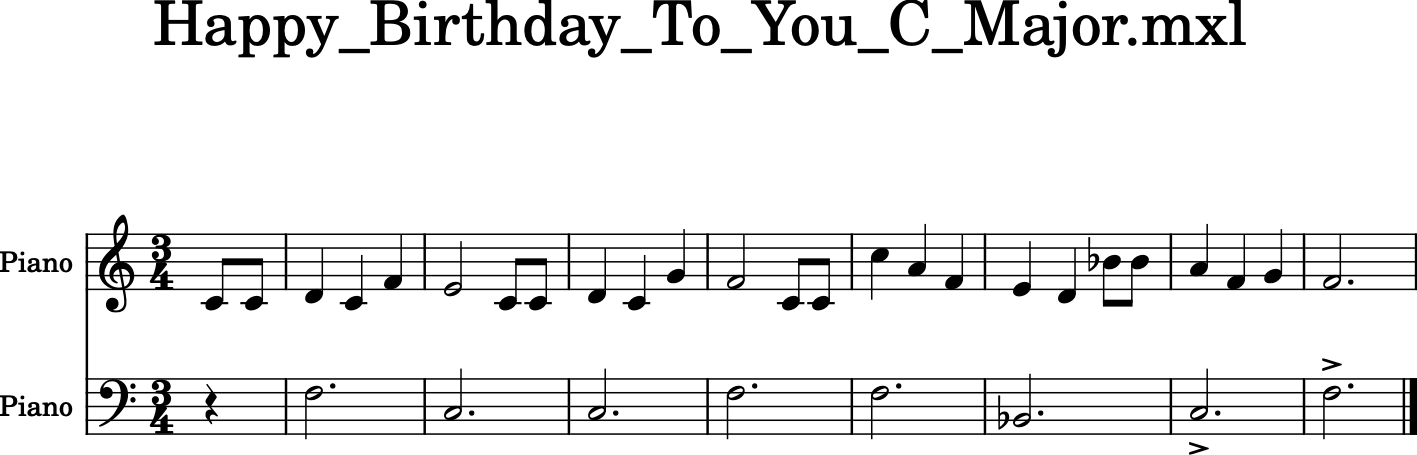

In [18]:
s.measures(0, 8).show('ipython.musicxml.png')

dlopen error : dlopen(libjack.0.dylib, 0x0001): tried: '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), '/Applications/MuseScore 3.app/Contents/MacOS/../Frameworks/libjack.0.dylib' (no such file), 'libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file), '/Users/june/workspace/simple-score-following/notebook/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
dlopen error : dlopen(/usr/local/lib/libjack.0.dylib, 0x0001): tried: '/usr/local/lib/libjack.0.dylib' (no such file), '/usr/lib/libjack.0.dylib' (no such file) 
Creating main window…
ZoomBox::setLogicalZoom(): Formatting logical zoom level as 100% (rounded from 1.000000)
Reading translations…
convert </var/folders/wf/m9s1kcjn5m3cm0k81x5_k_hc0000gn/T/music21/tmpsunxxv5n.xml>...
JIT is disabled for QML. Property bindings and animations will be very slow. Visit https://wiki.qt.io/V4 to learn about possible solutions for your platform.
	to </var/fo

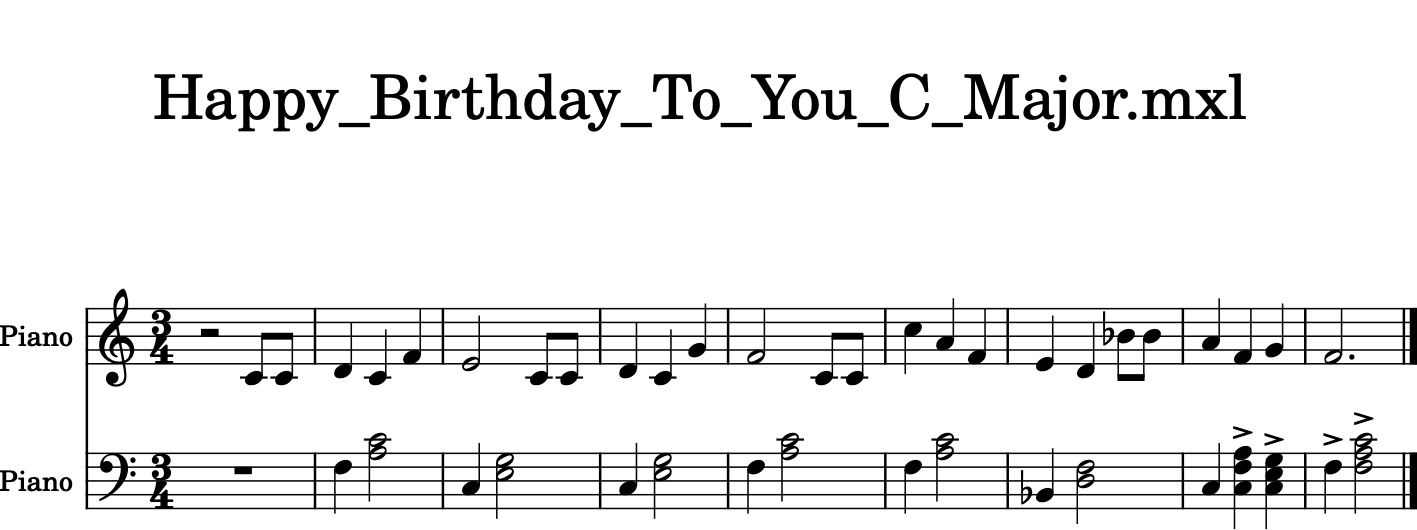

In [19]:
s.measures(10, 18).show('ipython.musicxml.png')